<div style="text-align: center; background: url('https://e1.pxfuel.com/desktop-wallpaper/999/176/desktop-wallpaper-aquarium-background-aquarium.jpg') no-repeat center center; background-size: cover; height: 300px; display: flex; align-items: center; justify-content: center;">
    <h1 style="font-size: 48px; color: white; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.7);">A Deep Learning Approach to Fish Classification</h1>
</div>

**Step 1: Import Required Libraries 𓆝 𓆟 𓆞 𓆝**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.decomposition import PCA
import os
import random
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

**Step 2: Load Dataset 𓆝 𓆟 𓆞 𓆝**

In [2]:
directory = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"

classes =  [i for i in os.listdir(path=directory) if "." not in i]
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

**Step 3: Prepare Image Paths and Labels 𓆝 𓆟 𓆞 𓆝**


In [3]:
label = [] 
path = []  

for dir_name, _, filenames in os.walk(directory):
    if dir_name.split()[-1] != "GT":
        for filename in filenames:
            if os.path.splitext(filename)[-1] == ".png":
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))

df = pd.DataFrame({
    "path": path,
    "label": label
})
print(df.head())  # Display the first few rows
print(df.columns)  # Display the column names

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
Index(['path', 'label'], dtype='object')


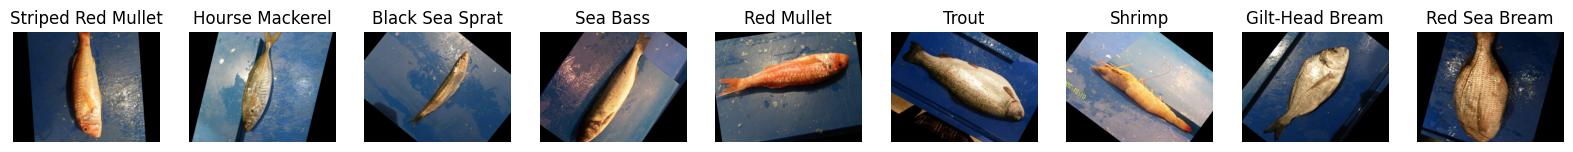

In [4]:
# Get one image of Striped Red Mullet
striped_red_mullet_df = df[df['label'] == 'Striped Red Mullet']
striped_red_mullet_image = random.choice(striped_red_mullet_df['path'].tolist())

# Get one image from each of the other classes
other_classes_images = []
for class_name in df['label'].unique():
    if class_name != 'Striped Red Mullet':
        class_images = df[df['label'] == class_name]['path'].tolist()
        other_classes_images.append(random.choice(class_images))

# Combine the images to display
all_images = [striped_red_mullet_image] + other_classes_images

# Set up the plot with a larger figure size
plt.figure(figsize=(20, 6))  # Further increase the figure size for better visibility
for i, img_path in enumerate(all_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, len(all_images), i + 1)
    plt.imshow(img)
    plt.title(df[df['path'] == img_path]['label'].values[0])  # Show the label as the title
    plt.axis('off')  # Turn off axis

plt.show()

In [5]:
df

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
...,...,...
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


In [6]:
print(f"Total image count: {df.shape[0]}")

Total image count: 9000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


**Step 4: Visualize Class Distribution 𓆝 𓆟 𓆞 𓆝**


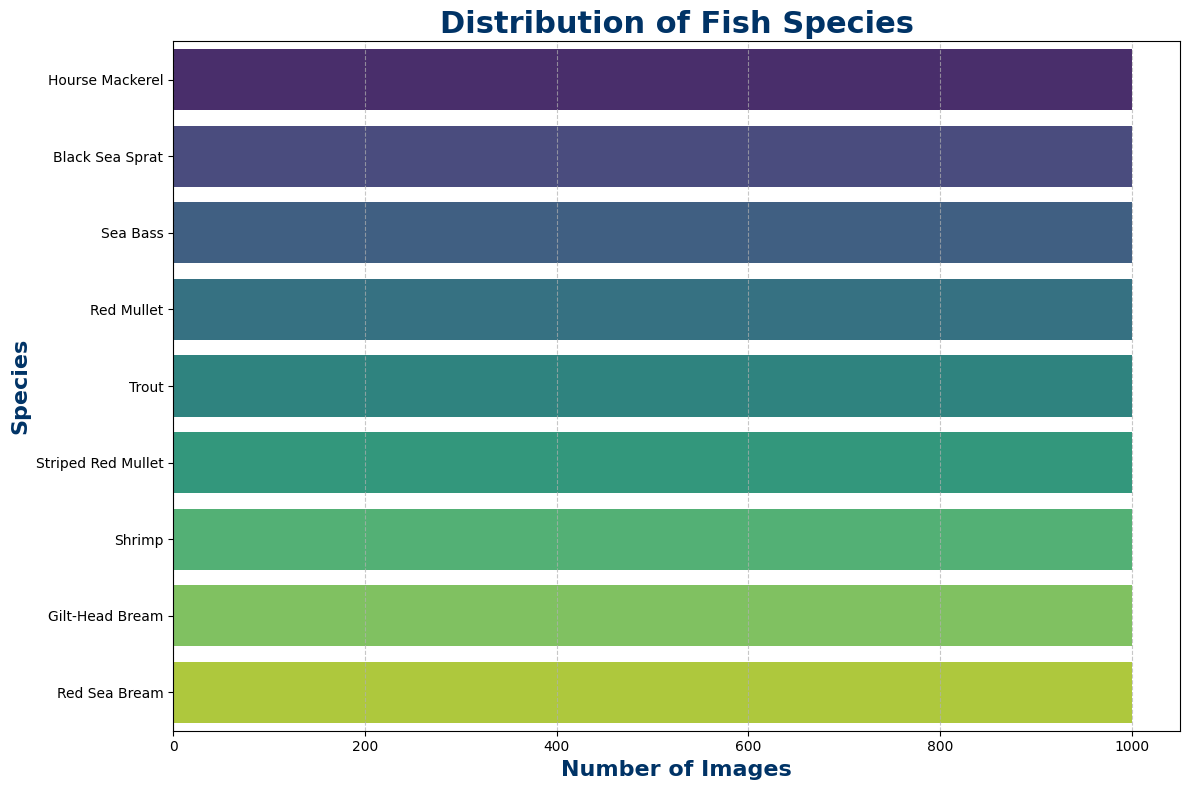

In [8]:
# Assuming you already have the DataFrame `df` created from previous steps

# Count the number of occurrences of each fish species
class_counts = df['label'].value_counts()

# Set up the figure with a larger size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis', orient='h')

# Customize the appearance
plt.title('Distribution of Fish Species', fontsize=22, fontweight='bold', color='#003366')
plt.xlabel('Number of Images', fontsize=16, fontweight='bold', color='#003366')
plt.ylabel('Species', fontsize=16, fontweight='bold', color='#003366')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

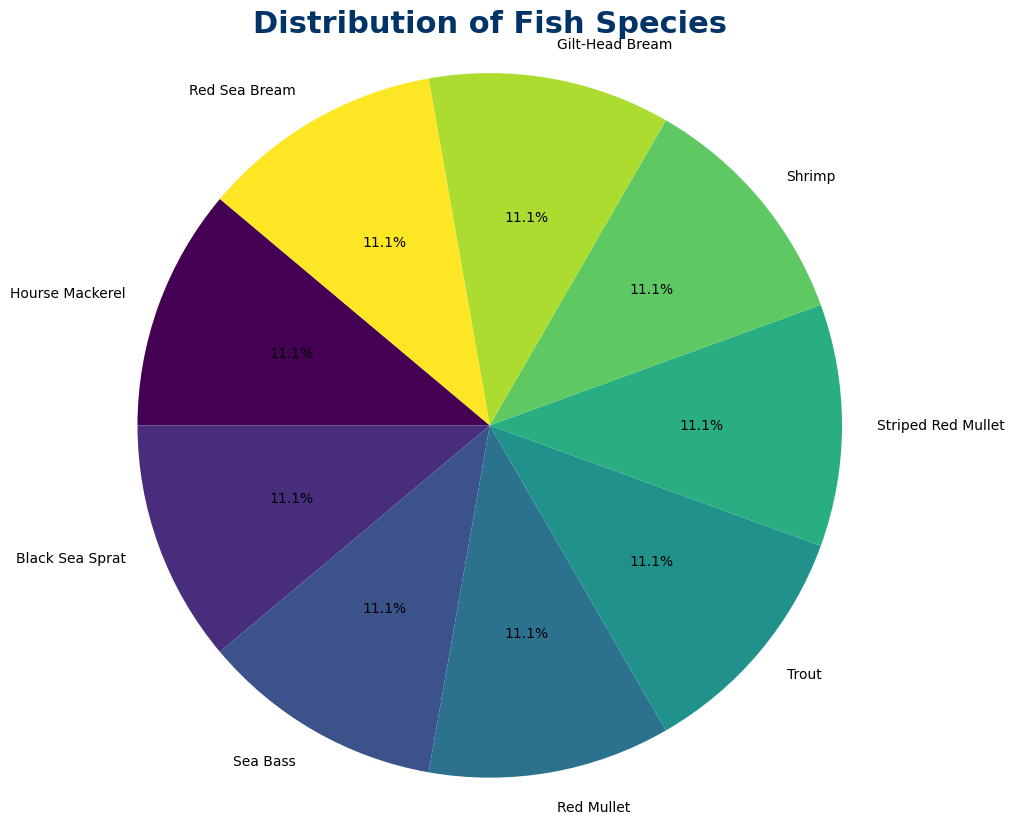

In [9]:
# Assuming you already have the DataFrame `df` created from previous steps

# Count the number of occurrences of each fish species
species_count = df['label'].value_counts()

# Set up the figure
plt.figure(figsize=(10, 10))

# Create a soft blue background with bubbles
plt.gca().set_facecolor('#87CEFA')  # Light blue color for the background

# Create bubbles effect (random circles)
for _ in range(50):
    circle = plt.Circle((np.random.rand(), np.random.rand()), np.random.rand() * 0.05, color='white', alpha=0.5)
    plt.gca().add_artist(circle)

# Set up the pie chart with soft colors
colors = plt.cm.viridis(np.linspace(0, 1, len(species_count)))  # Soft color palette
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%', startangle=140,
        colors=colors)

# Customize the appearance
plt.title('Distribution of Fish Species', fontsize=22, fontweight='bold', color='#003366')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

**Step5: Display Sample Images 𓆝 𓆟 𓆞 𓆝**


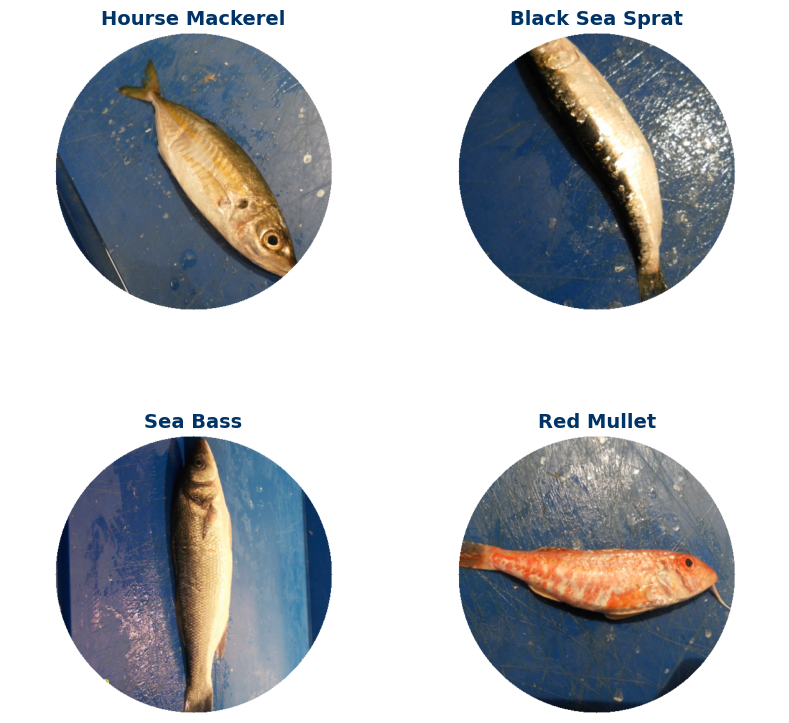

In [10]:
import cv2
# Set up the figure with a smaller size
plt.figure(figsize=(8, 8))

# Loop through the first 4 unique labels
for i, unique_label in enumerate(df['label'].unique()[:4]):
    # Get the first image path for the current label
    img_path = df[df['label'] == unique_label].iloc[0, 0]
    img = plt.imread(img_path)

    # Create a circular mask
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    cv2.circle(mask, (img.shape[1]//2, img.shape[0]//2), min(img.shape[0], img.shape[1])//2, 1, thickness=-1)

    # Create a somon background using the mask
    somon_background = np.zeros_like(img)
    somon_background[:] = [255, 160, 122]  # Set somon color (BGR format)

    # Create a subplot
    ax = plt.subplot(2, 2, i + 1)

    # Combine the original image and the somon background
    img_masked = np.where(mask[:, :, None] == 1, img, somon_background)

    # Display the masked image
    ax.imshow(img_masked)
    ax.set_title(unique_label, fontsize=14, fontweight='bold', color='#003366')
    ax.axis('off')
    
    # Remove the background color
    ax.set_facecolor('none')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing
plt.show()

Step 6: Data Preprocessing 𓆝 𓆟 𓆞 𓆝

In [11]:
# Veri setini eğitim, doğrulama ve test kümelerine ayırır.
train_data, test_data = train_test_split(df, test_size=0.15, random_state=42, stratify=df['label'])
train_data, val_data = train_test_split(train_data, test_size=0.1765, random_state=42, stratify=train_data['label'])

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(6299, 2)
(1350, 2)
(1351, 2)


In [12]:
# Gerekli kütüphaneleri içe aktar
from tqdm import tqdm  # İlerleme çubuğu için
from PIL import Image
import numpy as np

# Fonksiyon tanımı
def load_and_preprocess_images(df, img_width, img_height):
    images = []
    labels = []
    
    # İlerleme çubuğunu ekle
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Loading images"):
        img = Image.open(row['path']).convert('RGB')
        img = img.resize((img_width, img_height))
        img = np.array(img) / 255.0  # Normalizasyon
        images.append(img)
        labels.append(classes.index(row['label']))  # Etiketleri al

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Örnek kullanım
img_width, img_height = 128, 128  # Hedef boyutlar
X, y = load_and_preprocess_images(df, img_width, img_height)

print("Image loading and preprocessing completed.")
print("Loaded images shape:", X.shape)
print("Loaded labels shape:", y.shape)


Loading images: 100%|██████████| 9000/9000 [03:08<00:00, 47.69it/s]


Image loading and preprocessing completed.
Loaded images shape: (9000, 128, 128, 3)
Loaded labels shape: (9000,)


In [13]:
train_images, train_labels = load_and_preprocess_images(train_data, img_width, img_height)
test_images, test_labels = load_and_preprocess_images(test_data, img_width, img_height)
val_images, val_labels = load_and_preprocess_images(val_data, img_width, img_height)

Loading images: 100%|██████████| 1351/1351 [00:16<00:00, 79.81it/s]


In [14]:
# one-hot encoding yöntemini uygulayarak etiketleri kategorik verilere dönüştürür.
train_labels = to_categorical(train_labels, num_classes=len(classes))
test_labels = to_categorical(test_labels, num_classes=len(classes))
val_labels = to_categorical(val_labels, num_classes=len(classes))

In [15]:
##Veri setini eğitim, doğrulama ve test kümelerine ayırır.
train_data, test_data = train_test_split(df, test_size=0.15, random_state=42, stratify=df['label'])
train_data, val_data = train_test_split(train_data, test_size=0.1765, random_state=42, stratify=train_data['label'])

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(6299, 2)
(1350, 2)
(1351, 2)


In [16]:
print("Images shape:", X.shape)
print("Labels shape:", train_labels.shape)

Images shape: (9000, 128, 128, 3)
Labels shape: (6299, 9)


In [17]:
def visualize_sample_images(images, labels, num_samples=5, dataset_name=""):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        if isinstance(images[i], str):
            img = Image.open(images[i])  
        else:
            img = images[i]
        plt.imshow(img)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    
    plt.suptitle(f"{dataset_name} Kümesinden Örnek Resimler", fontsize=16)
    plt.tight_layout()
    plt.show()

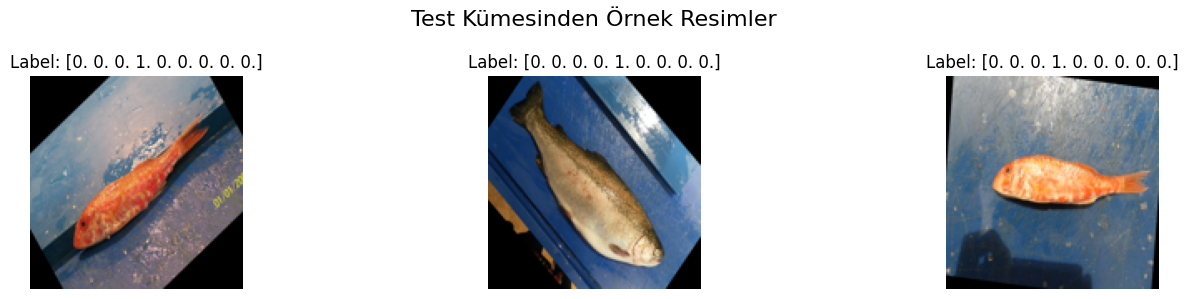

In [18]:
# Test görüntülerini yükleyin
X_test = []
for img_path in test_data['path']:
    img = Image.open(img_path)
    img = img.resize((img_width, img_height))  # Resize
    X_test.append(np.array(img))

X_test = np.array(X_test)

visualize_sample_images(X_test, test_labels, num_samples=3, dataset_name="Test")

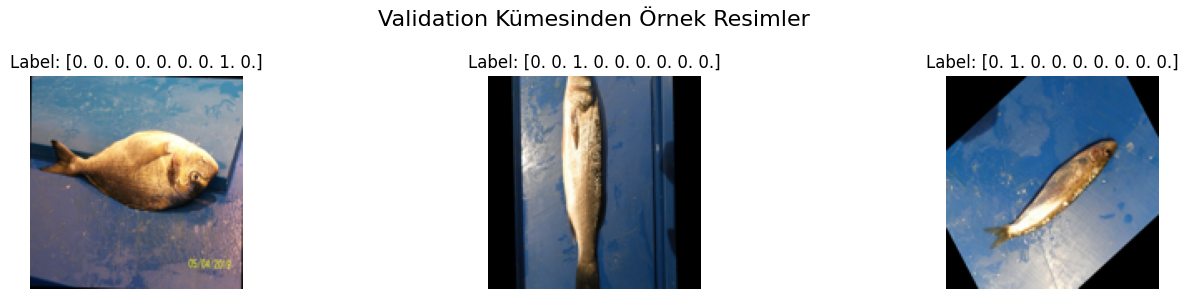

In [19]:
# Doğrulama görüntülerini yükleyin
X_val = []
for img_path in val_data['path']:
    img = Image.open(img_path)
    img = img.resize((img_width, img_height))  # Resize
    X_val.append(np.array(img))

X_val = np.array(X_val)

visualize_sample_images(X_val, val_labels, num_samples=3, dataset_name="Validation")


**Step 7: Build An ANN Model "Artificial Neural Network" 𓆝 𓆟 𓆞 𓆝**

In [20]:
model = Sequential()

# Giriş katmanı
model.add(Flatten(input_shape=(img_width, img_height, 3)))

# İlk katman 
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  

# İkinci katman
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Üçüncü katman
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dördüncü katman 
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

# Çıktı katmanı
model.add(Dense(len(classes), activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    50,332,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,030,537 (194.67 MB)

 Trainable params: 51,026,697 (194.65 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [21]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
# Modelin gereksiz yere uzun süre eğitilmesini ve aşırı öğrenmeyi önlemek için erken durdurma tekniğini kullanmak üzere bir yapılandırma oluşturur.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [23]:
# Eğitim için fit fonksiyonunu çağırın
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    epochs=50,
                    batch_size=16,
                    callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1729939516.235539      72 service.cc:145] XLA service 0x7d5dc4009920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729939516.235605      72 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729939516.235609      72 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 13/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1440 - loss: 2.7970

I0000 00:00:1729939525.370459      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.2949 - loss: 2.1176 - val_accuracy: 0.5130 - val_loss: 1.3579
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4895 - loss: 1.4644 - val_accuracy: 0.6306 - val_loss: 1.1982
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5710 - loss: 1.2384 - val_accuracy: 0.7106 - val_loss: 0.8684
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6320 - loss: 1.0536 - val_accuracy: 0.7543 - val_loss: 0.7385
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6763 - loss: 0.9472 - val_accuracy: 0.7979 - val_loss: 0.6306
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7010 - loss: 0.8603 - val_accuracy: 0.7328 - val_loss: 0.7348
Epoch 7/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7302 - loss: 0.7721 - val_accuracy: 0.7328 - val_loss: 0.7746
Epoch 8/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7585 - loss: 0.7035 - val_accuracy: 0.84

In [24]:
# Print training and validation loss and accuracy
print("\nTraining Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

print("\nTraining Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])



Training Loss: 0.24822774529457092
Validation Loss: 0.3254833519458771

Training Accuracy: 0.9103032350540161
Validation Accuracy: 0.8926721215248108


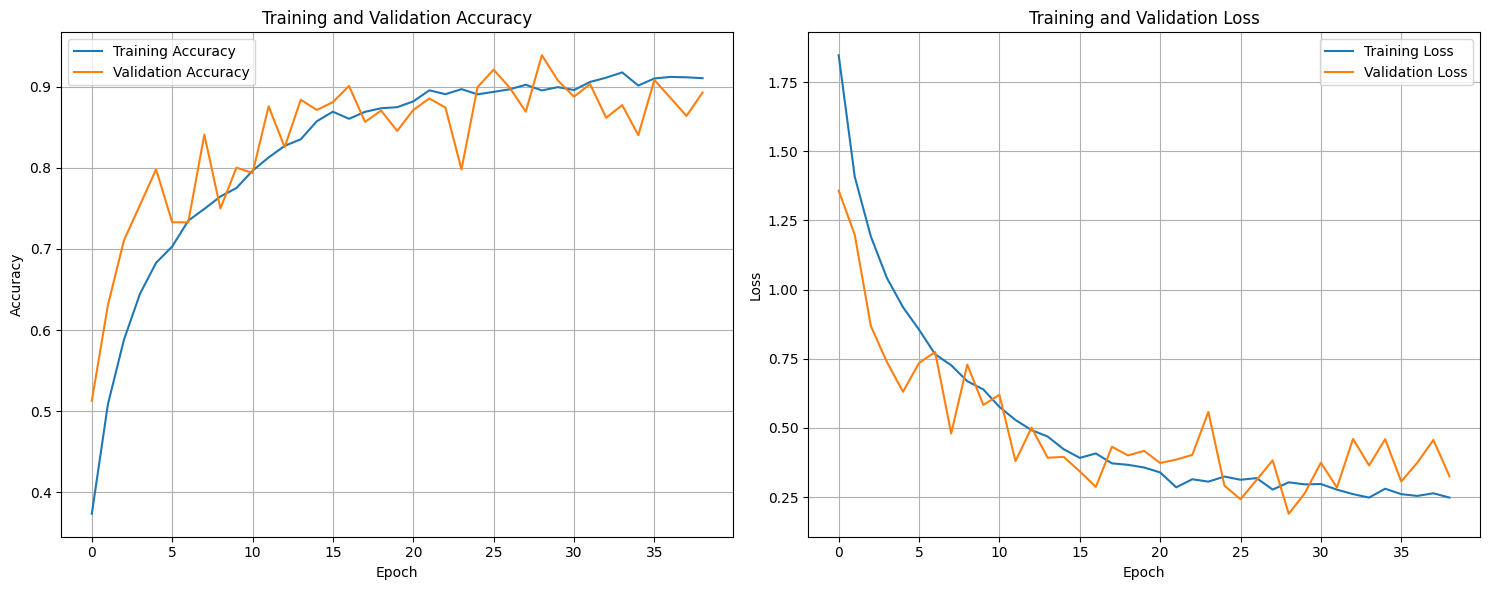

In [25]:
# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()
axs[0].grid()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()
axs[1].grid()

# Show the plots
plt.tight_layout()
plt.show()

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
                    precision    recall  f1-score   support

   Hourse Mackerel       0.90      0.97      0.93       150
   Black Sea Sprat       0.92      0.95      0.93       150
          Sea Bass       0.97      0.79      0.87       150
        Red Mullet       0.95      1.00      0.97       150
             Trout       0.99      0.91      0.95       150
Striped Red Mullet       0.88      0.96      0.92       150
            Shrimp       0.98      0.95      0.97       150
   Gilt-Head Bream       0.92      0.93      0.93       150
     Red Sea Bream       0.95      0.96      0.95       150

          accuracy                           0.94      1350
         macro avg       0.94      0.94      0.94      1350
      weighted avg       0.94      0.94      0.94      1350



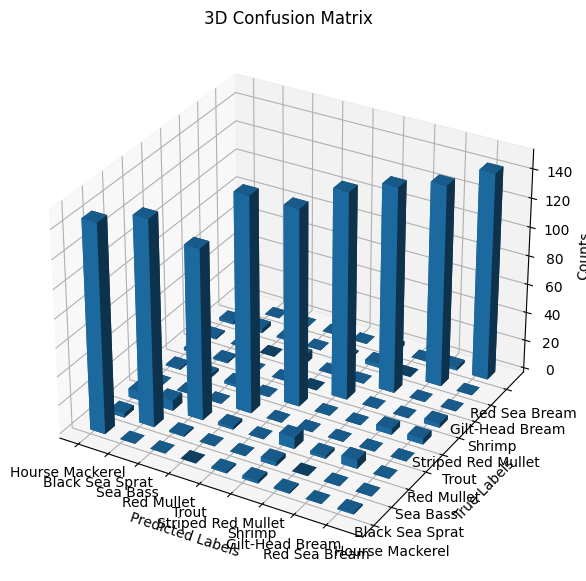

In [26]:
# Assuming predictions, test_labels, and classes are already defined

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

y_true_labels = true_classes  # True labels
y_pred_labels = predicted_classes  # Predicted labels

# Print classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=classes))

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# 3D Visualization of Confusion Matrix
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x_pos, y_pos = np.meshgrid(np.arange(len(classes)), np.arange(len(classes)))
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

# Define the heights of the bars
dz = cm.flatten()

# Create 3D bars
dx = dy = 0.5  # Width and depth of each bar
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True)

# Set labels
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_zlabel('Counts')
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set_title('3D Confusion Matrix')

plt.show()

**Step 8: Making Predictions on Test Data 𓆝 𓆟 𓆞 𓆝**


In [27]:
for i in range(10):
    print(f"Gerçek sınıf: {classes[true_classes[i]]}, Tahmin edilen: {classes[predicted_classes[i]]}")

Gerçek sınıf: Red Mullet, Tahmin edilen: Red Mullet
Gerçek sınıf: Trout, Tahmin edilen: Trout
Gerçek sınıf: Red Mullet, Tahmin edilen: Red Mullet
Gerçek sınıf: Striped Red Mullet, Tahmin edilen: Striped Red Mullet
Gerçek sınıf: Sea Bass, Tahmin edilen: Sea Bass
Gerçek sınıf: Trout, Tahmin edilen: Trout
Gerçek sınıf: Shrimp, Tahmin edilen: Red Mullet
Gerçek sınıf: Shrimp, Tahmin edilen: Shrimp
Gerçek sınıf: Striped Red Mullet, Tahmin edilen: Striped Red Mullet
Gerçek sınıf: Sea Bass, Tahmin edilen: Sea Bass


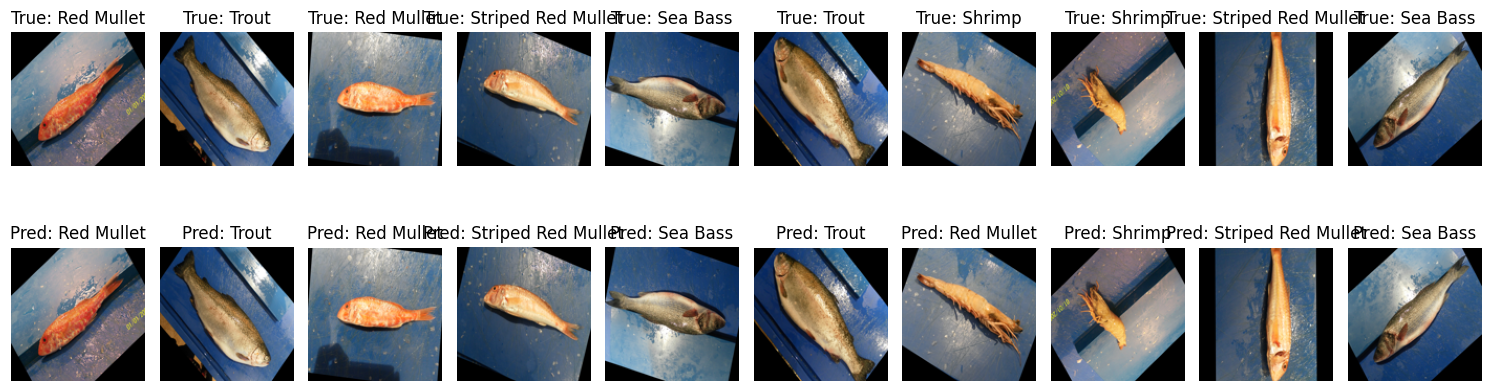

In [28]:
# Set up the figure with a larger size
plt.figure(figsize=(15, 5))

# Loop through the first 10 images
for i in range(10):
    # Display the actual image
    plt.subplot(2, 10, i + 1)
    plt.imshow(test_images[i])  # Assuming test_images are already normalized
    plt.title(f"True: {classes[true_classes[i]]}")
    plt.axis('off')

    # Display the predicted image
    plt.subplot(2, 10, i + 11)
    plt.imshow(test_images[i])  # Same image for visualization
    plt.title(f"Pred: {classes[predicted_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

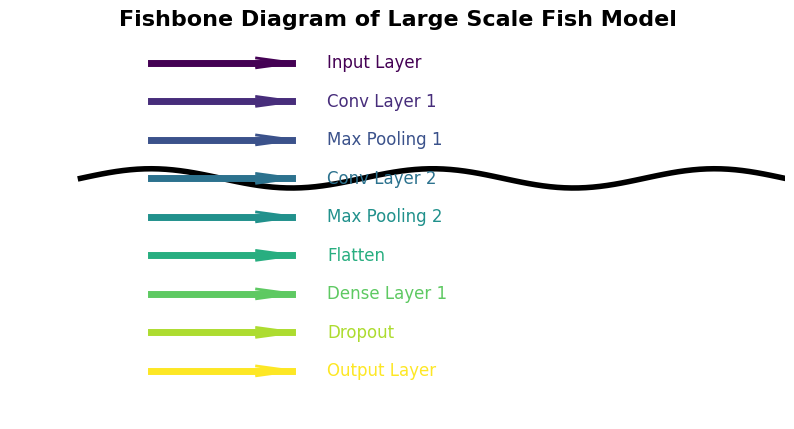

In [29]:
import matplotlib.patches as patches

def draw_fishbone(ax, segments):
    """Draw a fishbone diagram resembling a fish."""
    # Draw the main backbone (curved line)
    x_backbone = np.linspace(0, 1, 100)
    y_backbone = 0.1 * np.sin(5 * np.pi * x_backbone)  # Create a sine wave for the backbone
    ax.plot(x_backbone, y_backbone, color='black', linewidth=4)  # Main backbone

    # Draw the branches with colors and fins
    colors = plt.cm.viridis(np.linspace(0, 1, len(segments)))  # Use a colormap for colors
    for (name, y_offset), color in zip(segments.items(), colors):
        # Create branches
        ax.plot([0.1, 0.3], [y_offset, y_offset], color=color, linewidth=5)  # Branch
        ax.text(0.35, y_offset, name, fontsize=12, ha='left', va='center', color=color)  # Layer name
        
        # Draw little fins on the branches
        ax.plot([0.25, 0.3], [y_offset + 0.05, y_offset], color=color, linewidth=2)  # Upper fin
        ax.plot([0.25, 0.3], [y_offset - 0.05, y_offset], color=color, linewidth=2)  # Lower fin

# Create the fishbone diagram
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(-0.1, 1.0)
ax.set_ylim(-2.5, 1.5)
ax.axis('off')  # Hide axes

# Define model segments with their positions
model_segments = {
    'Input Layer': 1.2,
    'Conv Layer 1': 0.8,
    'Max Pooling 1': 0.4,
    'Conv Layer 2': 0.0,
    'Max Pooling 2': -0.4,
    'Flatten': -0.8,
    'Dense Layer 1': -1.2,
    'Dropout': -1.6,
    'Output Layer': -2.0
}

# Draw the fishbone diagram
draw_fishbone(ax, model_segments)

# Show the diagram
plt.title("Fishbone Diagram of Large Scale Fish Model", fontsize=16, fontweight='bold')
plt.show()

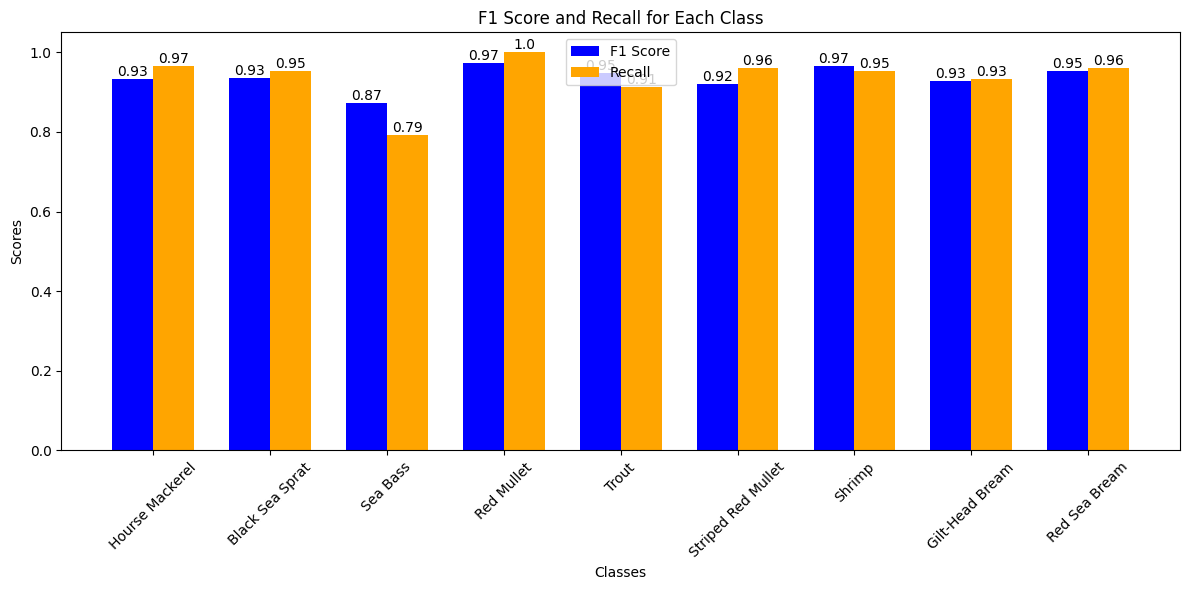

In [30]:
from sklearn.metrics import f1_score, recall_score

# F1 skoru ve recall değerlerini hesapla
f1 = f1_score(y_true_labels, y_pred_labels, average=None)  # Her sınıf için F1 skoru
recall = recall_score(y_true_labels, y_pred_labels, average=None)  # Her sınıf için recall

# Sınıf isimlerini ve hesaplanan değerleri bir DataFrame'e yerleştir
metrics_df = pd.DataFrame({
    'Class': classes,
    'F1 Score': f1,
    'Recall': recall
})

# Görselleştirme
fig, ax = plt.subplots(figsize=(12, 6))

# F1 Skorları için çubuk grafiği
bar_width = 0.35
x = np.arange(len(classes))

# F1 Skoru ve Recall değerlerini ekleme
bars1 = ax.bar(x - bar_width/2, metrics_df['F1 Score'], bar_width, label='F1 Score', color='blue')
bars2 = ax.bar(x + bar_width/2, metrics_df['Recall'], bar_width, label='Recall', color='orange')

# Etiketleme ve başlık
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('F1 Score and Recall for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

# Değerleri çubukların üstünde göster
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Grafiği gösterme
plt.tight_layout()
plt.show()

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


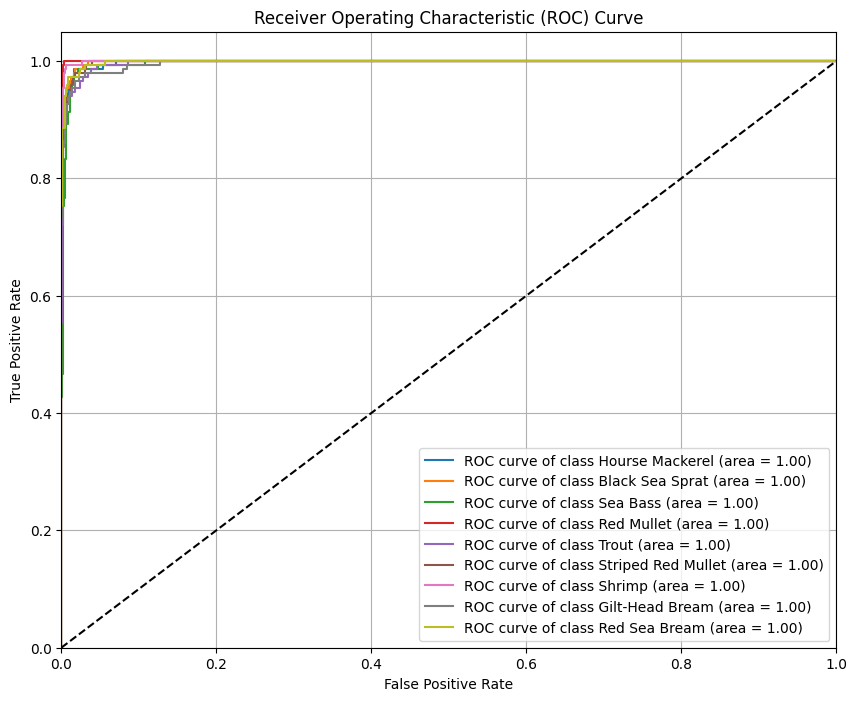

In [31]:
from sklearn.metrics import roc_curve, auc

# Binary sınıflandırma için (bir sınıf vs diğerleri) her bir sınıf için ROC eğrisi hesapla
# Burada '1' olarak tanımlanan sınıf için ROC eğrisi hesaplanıyor. Bu kodu her sınıf için döngüyle tekrar edebilirsiniz.
y_true = y_true_labels  # Gerçek etiketler
y_scores = model.predict(test_images)  # Modelden elde edilen olasılıklar

# ROC ve AUC hesaplama
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true_labels == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisi görselleştirme
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()